In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Создание датафрейма с данными
data = {
    'Research': ['Alsubai et al. (2023)', 'Wang et al. (2024)', 'Zhao et al. (2016)', 'Tang et al. (2021)',
                 'Kanavati (2022)', 'Cheng (2021)', 'Zhu (2021)', 'Holmström et al. (2021)', 'Deo (2023)',
                 'Göker (2024)', 'Bhatt et al. (2021)', 'Jiang et al. (2025)', 'Wong et al. (2023)',
                 'Fang et al. (2024)', 'Alzahrani et al. (2024)', 'Wang et al. (2020)'],

    'Risk_of_Bias_Patient_Selection': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
                                       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High'],
    'Risk_of_Bias_Index_Test': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
                                'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High'],
    'Risk_of_Bias_Reference_Standard': ['Low', 'Low', 'Low', 'Low', 'Unclear', 'Low', 'Low', 'High',
                                        'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Unclear', 'Low'],
    'Risk_of_Bias_Flow_Timing': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
                                 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High'],

    'Applicability_Concerns_Patient_Selection': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
                                                 'Unclear', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low'],
    'Applicability_Concerns_Index_Test': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
                                          'Unclear', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low'],
    'Applicability_Concerns_Reference_Standard': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
                                                  'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Unclear', 'Low']
}

df = pd.DataFrame(data)
# Устанавливаем названия исследований в качестве индекса для удобства
df.set_index('Research', inplace=True)



In [ ]:
# Посмотрим на нашу таблицу
print("Сводная таблица QUADAS-2:")
df.head(20)

Сводная таблица QUADAS-2:


,Risk_of_Bias_Patient_Selection,Risk_of_Bias_Index_Test,Risk_of_Bias_Reference_Standard,Risk_of_Bias_Flow_Timing,Applicability_Concerns_Patient_Selection,Applicability_Concerns_Index_Test,Applicability_Concerns_Reference_Standard
Research,,,,,,,
Alsubai et al. (2023),Low,Low,Low,Low,Low,Low,Low
Wang et al. (2024),Low,Low,Low,Low,Low,Low,Low
Zhao et al. (2016),Low,Low,Low,Low,Low,Low,Low
Tang et al. (2021),Low,Low,Low,Low,Low,Low,Low
Kanavati (2022),Low,Low,Unclear,Low,Low,Low,Low
Cheng (2021),Low,Low,Low,Low,Low,Low,Low
Zhu (2021),Low,Low,Low,Low,Low,Low,Low
Holmström et al. (2021),Low,Low,High,Low,Low,Low,High
Deo (2023),Low,Low,Low,Low,Unclear,Unclear,Low


In [ ]:
# Функция для подсчета процентов в каждом домене
def calculate_percentages(domain_series):
    counts = domain_series.value_counts()
    percentages = (counts / len(domain_series)) * 100
    # Убедимся, что у нас есть все категории, даже если их процент равен 0
    for category in ['High', 'Low', 'Unclear']:
        if category not in percentages:
            percentages[category] = 0
    return percentages

# Создаем сводный DataFrame для визуализации
summary_data = {}
for column in df.columns:
    summary_data[column] = calculate_percentages(df[column])

summary_df = pd.DataFrame(summary_data).fillna(0)  # Заменяем NaN на 0 на случай отсутствия категории
summary_df = summary_df.reindex(['High', 'Unclear', 'Low'])  # Упорядочиваем строки

print("\nСводная статистика (% по доменам):")
print(summary_df)


Сводная статистика (% по доменам):
         Risk_of_Bias_Patient_Selection  Risk_of_Bias_Index_Test  \
High                              18.75                     6.25   
Unclear                            0.00                     0.00   
Low                               81.25                    93.75   

         Risk_of_Bias_Reference_Standard  Risk_of_Bias_Flow_Timing  \
High                                12.5                      12.5   
Unclear                             12.5                       0.0   
Low                                 75.0                      87.5   

         Applicability_Concerns_Patient_Selection  \
High                                        12.50   
Unclear                                      6.25   
Low                                         81.25   

         Applicability_Concerns_Index_Test  \
High                                  6.25   
Unclear                               6.25   
Low                                  87.50   

         App

Барплот сохранен в файлы: quadas2_barplot.pdf, .png, .svg


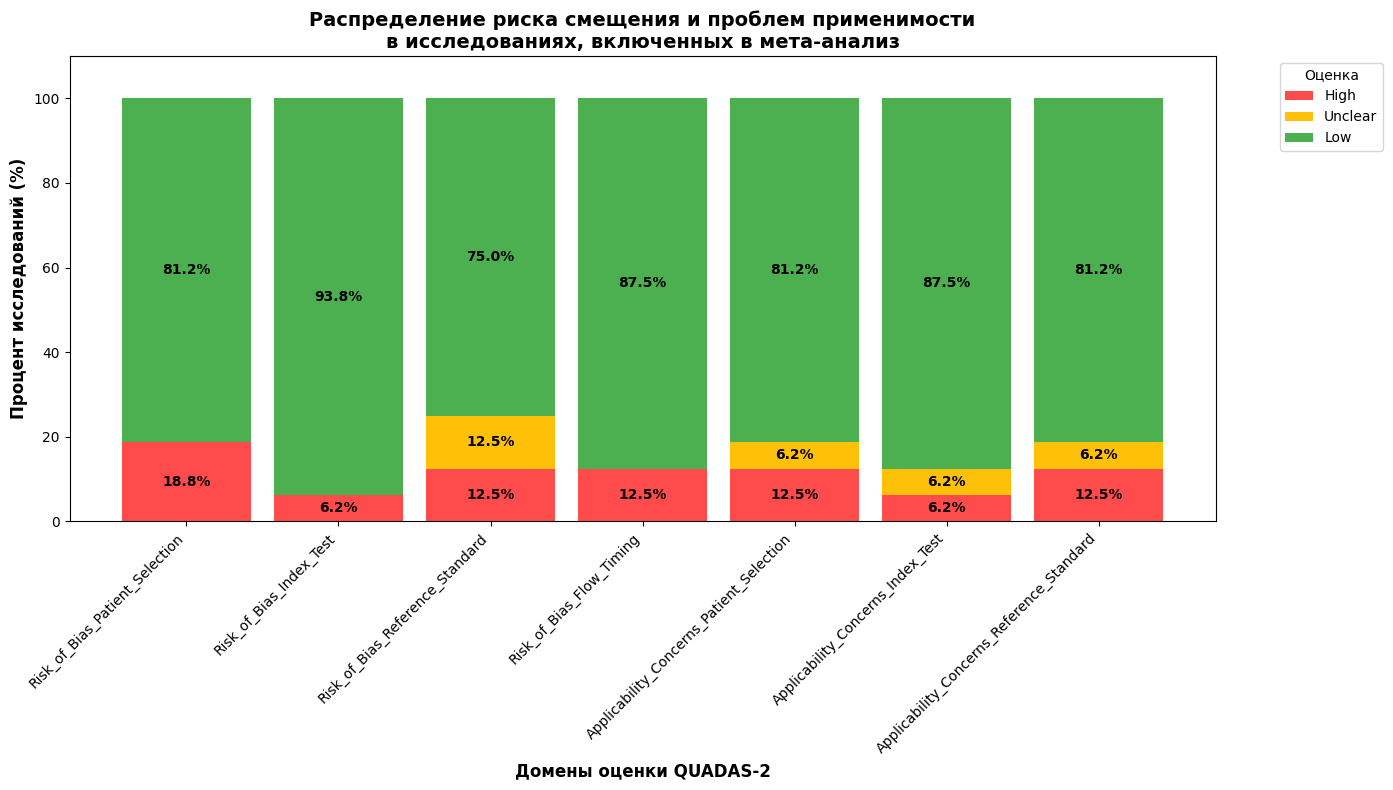

In [ ]:
# Настройка стиля и размера графика
plt.figure(figsize=(14, 8))
bar_width = 0.85
domains = summary_df.columns
categories = summary_df.index
x_pos = np.arange(len(domains))

# Цвета для категорий
colors = {'High': '#FF4B4B', 'Unclear': '#FFC107', 'Low': '#4CAF50'}

# Создаем stacked bar plot
bottom_values = np.zeros(len(domains))
for i, category in enumerate(categories):
    plt.bar(x_pos, summary_df.loc[category], bar_width, label=category, bottom=bottom_values, color=colors[category])
    bottom_values += summary_df.loc[category]

# Настройка внешнего вида графика
plt.xlabel('Домены оценки QUADAS-2', fontsize=12, fontweight='bold')
plt.ylabel('Процент исследований (%)', fontsize=12, fontweight='bold')
plt.title('Распределение риска смещения и проблем применимости\nв исследованиях, включенных в мета-анализ', fontsize=14, fontweight='bold')
plt.xticks(x_pos, domains, rotation=45, ha='right')
plt.ylim(0, 110)
plt.legend(title='Оценка', bbox_to_anchor=(1.05, 1), loc='upper left')

#Добавляем подписи значений (необязательно, можно убрать для чистоты)
for i, domain in enumerate(domains):
   bottom = 0
   for category in categories:
         value = summary_df.loc[category, domain]
         if value > 5:  # Подписываем только значительные проценты
             plt.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center', fontweight='bold')
         bottom += value

plt.tight_layout()

# Сохраняем барплот в разных форматах
plt.savefig('quadas2_barplot.pdf', bbox_inches='tight', dpi=300)
plt.savefig('quadas2_barplot.png', bbox_inches='tight', dpi=300)
plt.savefig('quadas2_barplot.svg', bbox_inches='tight', dpi=300)
print("Барплот сохранен в файлы: quadas2_barplot.pdf, .png, .svg")

plt.show()

/tmp/ipython-input-3069247693.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_numeric = df.applymap(lambda x: rating_map.get(x, 0)) # 0 для любых неучтенных значений


Тепловая карта сохранена в файлы: quadas2_heatmap.pdf, .png, .svg


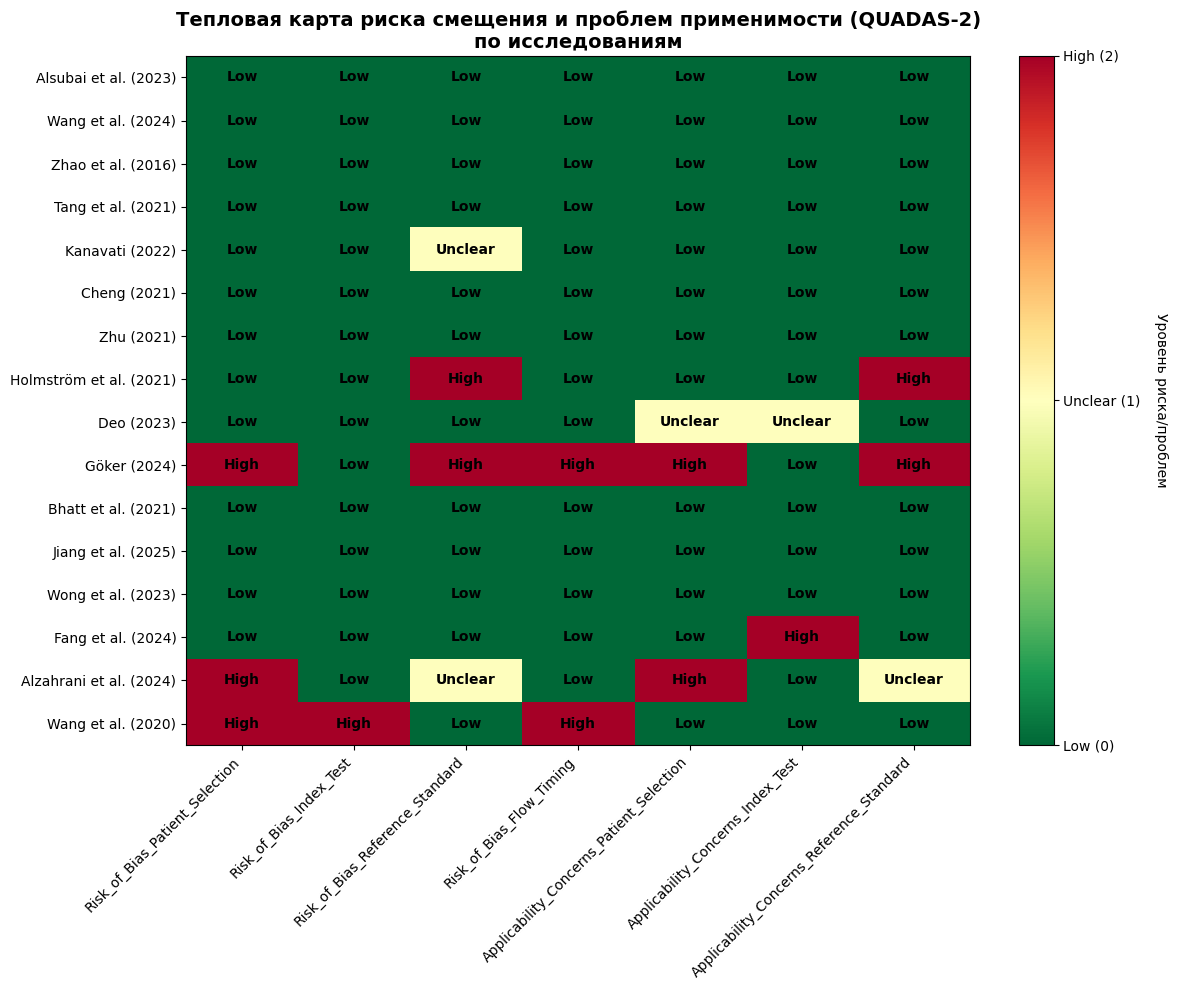

In [ ]:
# Создаем числовое представление для тепловой карты (маппим оценки в числа)
rating_map = {'High': 2, 'Unclear': 1, 'Low': 0}
df_numeric = df.applymap(lambda x: rating_map.get(x, 0)) # 0 для любых неучтенных значений

# Настройка тепловой карты
plt.figure(figsize=(12, 10))
im = plt.imshow(df_numeric, aspect='auto', cmap='RdYlGn_r') # _r для инверсии цветов: красный=High

# Настройка осей
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.yticks(range(len(df.index)), df.index)
plt.title('Тепловая карта риска смещения и проблем применимости (QUADAS-2)\nпо исследованиям', fontsize=14, fontweight='bold')

# Добавляем цветовую легенду
cbar = plt.colorbar(im, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Low (0)', 'Unclear (1)', 'High (2)'])
cbar.set_label('Уровень риска/проблем', rotation=270, labelpad=20)

# Добавляем аннотации (сами текстовые оценки)
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = plt.text(j, i, df.iloc[i, j],
                       ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()

# Сохраняем тепловую карту в разных форматах
plt.savefig('quadas2_heatmap.pdf', bbox_inches='tight', dpi=300)
plt.savefig('quadas2_heatmap.png', bbox_inches='tight', dpi=300)
plt.savefig('quadas2_heatmap.svg', bbox_inches='tight', dpi=300)
print("Тепловая карта сохранена в файлы: quadas2_heatmap.pdf, .png, .svg")

plt.show()

In [ ]:
# РАСШИРЕННАЯ СТАТИСТИКА
print("="*80)
print("ПОДРОБНАЯ СТАТИСТИКА")
print("="*80)

# 1. Общая статистика по всем доменам
print("1. ОБЩАЯ СТАТИСТИКА ПО ВСЕМ ИССЛЕДОВАНИЯМ:")
print("-" * 50)
total_studies = len(df)
print(f"Всего исследований: {total_studies}")

# 2. Статистика по Risk of Bias
print("\n2. СТАТИСТИКА ПО RISK OF BIAS:")
print("-" * 50)
rob_columns = [col for col in df.columns if 'Risk_of_Bias' in col]
rob_df = df[rob_columns]

rob_summary = pd.DataFrame()
for col in rob_columns:
    counts = rob_df[col].value_counts()
    rob_summary[col] = counts

print("Абсолютные значения:")
print(rob_summary.fillna(0).astype(int).to_string())

print("\nПроцентные значения:")
rob_percentage = pd.DataFrame()
for col in rob_columns:
    percentages = (rob_df[col].value_counts() / total_studies * 100).round(1)
    rob_percentage[col] = percentages
print(rob_percentage.fillna(0).to_string())

# 3. Статистика по Applicability Concerns
print("\n3. СТАТИСТИКА ПО APPLICABILITY CONCERNS:")
print("-" * 50)
app_columns = [col for col in df.columns if 'Applicability' in col]
app_df = df[app_columns]

app_summary = pd.DataFrame()
for col in app_columns:
    counts = app_df[col].value_counts()
    app_summary[col] = counts

print("Абсолютные значения:")
print(app_summary.fillna(0).astype(int).to_string())

print("\nПроцентные значения:")
app_percentage = pd.DataFrame()
for col in app_columns:
    percentages = (app_df[col].value_counts() / total_studies * 100).round(1)
    app_percentage[col] = percentages
print(app_percentage.fillna(0).to_string())

# 4. Исследования с высоким риском смещения
print("\n4. ИССЛЕДОВАНИЯ С ВЫСОКИМ РИСКОМ СМЕЩЕНИЯ:")
print("-" * 50)
high_risk_studies = {}
for col in rob_columns:
    high_risk = df[df[col] == 'High'].index.tolist()
    if high_risk:
        high_risk_studies[col] = high_risk

for domain, studies in high_risk_studies.items():
    print(f"{domain}: {len(studies)} исследований")
    for study in studies:
        print(f"  - {study}")

# 5. Исследования с проблемами применимости
print("\n5. ИССЛЕДОВАНИЯ С ПРОБЛЕМАМИ ПРИМЕНИМОСТИ:")
print("-" * 50)
high_app_studies = {}
for col in app_columns:
    high_app = df[df[col] == 'High'].index.tolist()
    if high_app:
        high_app_studies[col] = high_app

for domain, studies in high_app_studies.items():
    print(f"{domain}: {len(studies)} исследований")
    for study in studies:
        print(f"  - {study}")

# 6. Сводная таблица по всем доменам
print("\n6. СВОДНАЯ ТАБЛИЦА (% ПО ДОМЕНАМ):")
print("-" * 50)
print(summary_df.round(1).to_string())

# 7. Общие показатели качества
print("\n7. ОБЩИЕ ПОКАЗАТЕЛИ КАЧЕСТВА:")
print("-" * 50)

# Процент исследований с низким риском по всем доменам Risk of Bias
low_risk_all = df[rob_columns].apply(lambda x: (x == 'Low').all(), axis=1)
print(f"Исследования с низким риском смещения по всем 4 доменам: {low_risk_all.sum()} ({low_risk_all.sum()/total_studies*100:.1f}%)")

# Процент исследований с низкими проблемами применимости по всем доменам
low_app_all = df[app_columns].apply(lambda x: (x == 'Low').all(), axis=1)
print(f"Исследования с низкими проблемами применимости по всем 3 доменам: {low_app_all.sum()} ({low_app_all.sum()/total_studies*100:.1f}%)")

# Исследования с идеальным качеством (низкий риск + низкие проблемы применимости)
perfect_quality = df.apply(lambda x: (x == 'Low').all(), axis=1)
print(f"Исследования с идеальным качеством (все домены 'Low'): {perfect_quality.sum()} ({perfect_quality.sum()/total_studies*100:.1f}%)")

print("="*80)

ПОДРОБНАЯ СТАТИСТИКА
1. ОБЩАЯ СТАТИСТИКА ПО ВСЕМ ИССЛЕДОВАНИЯМ:
--------------------------------------------------
Всего исследований: 16

2. СТАТИСТИКА ПО RISK OF BIAS:
--------------------------------------------------
Абсолютные значения:
                                Risk_of_Bias_Patient_Selection  Risk_of_Bias_Index_Test  Risk_of_Bias_Reference_Standard  Risk_of_Bias_Flow_Timing
Risk_of_Bias_Patient_Selection                                                                                                                    
Low                                                         13                       15                               12                        14
High                                                         3                        1                                2                         2

Процентные значения:
                                Risk_of_Bias_Patient_Selection  Risk_of_Bias_Index_Test  Risk_of_Bias_Reference_Standard  Risk_of_Bias_Flow_Timing
R